In [1]:
using LinearAlgebra
using Plots
using CairoMakie
using LaTeXStrings

In [2]:
module qm
    include("QuantumMaster.jl")
end

Main.qm

In [3]:
# The Hamiltonian parameters (the potential breaks inversion symmetry)
t1 = 1.5
t2 = 1.0
V = 1.5

# Thermal bath parameters
γ = 1e-3
temperature = 0.1 

# The measurement parameters
θ = π/4
ϕ = 0.0

# The simulation parameters, the sampling is different for different times
# between the measurements
N = 3
n = 2

start = 1e-5
step = 1e-4
limit = 0.99

step2 = 1.0
limit2 = 100.0

step3 = 10.0
limit3 = 10000.0

step4 = 0.04e7
limit4 = 1e9

τmAs = exp.(([start:step:limit; ] ).^2).-ones(length([start:step:limit;]))
τmBs = [τmAs[length(τmAs)]:step2:limit2; ]
τmCs = [limit2:step3:limit3; ]
τmDs = [limit3:step4:limit4; ]

τms = [τmAs; τmBs; τmCs; τmDs]

curs_h = Vector{Float64}(undef, length(τms))
curs_m = Vector{Float64}(undef, length(τms))


for i in eachindex(τms) 
    curs_h[i] = qm.current_h_ss(t1, t2, V, γ, temperature, θ, ϕ, τms[i], N)
    curs_m[i] = qm.current_m_ss(t1, t2, V, γ, temperature, θ, ϕ, τms[i], N)
end

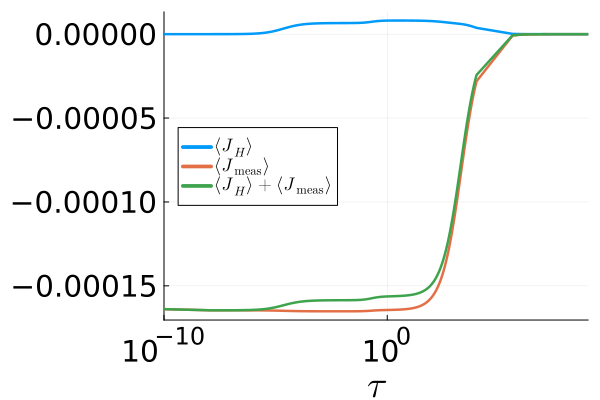

In [4]:
Plots.plot(τms, curs_h, label=L"\langle J_{H}\rangle", linewidth=2.5, xlabelfontsize=25, titlefontsize=20,
     legendfontsize=12, ylabelfontsize=20, xtickfontsize=20, ytickfontsize=20, legend=:left, xscale=:log10, xlims=(1e-10, limit4))
Plots.plot!(τms, curs_m, label=L"\langle J_{\mathrm{meas}}\rangle", linewidth=2.5)
Plots.plot!(τms, curs_h+curs_m, label=L"\langle J_H\rangle+\langle J_{\mathrm{meas}}\rangle", linewidth=2.5)
Plots.xlabel!(L"\tau")

In [5]:
Plots.savefig("images/steady_state_example2.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/steady_state_example2.png"